# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Call the Open Weather API and check we get 'OK' reponse
        weather_response = requests.get(city_url)
        
        if (weather_response.status_code == 200):
            
            # Parse the JSON and retrieve data
            city_weather = weather_response.json()
            
            # Example JSON record from the reponse:
            # Processing Record 1 of Set 1 | koumra
            # {'coord': {'lon': 17.5539, 'lat': 8.9126}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 35.02, 'feels_like': 35.61, 'temp_min': 35.02, 'temp_max': 35.02, 'pressure': 1008, 'humidity': 34, 'sea_level': 1008, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.42, 'deg': 194, 'gust': 1.9}, 'clouds': {'all': 16}, 'dt': 1719665239, 'sys': {'country': 'TD', 'sunrise': 1719635645, 'sunset': 1719681136}, 'timezone': 3600, 'id': 2429605, 'name': 'Koumra', 'cod': 200}

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]            
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]            
            city_clouds = city_weather["clouds"]["all"]                                       
            city_wind = city_weather["wind"]["speed"]                                     
            city_country = city_weather["sys"]["country"]                                        
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | undurkhaan
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sake
Processing Record 6 of Set 1 | bouca
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | hammerfest
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | darwin
Processing Record 13 of Set 1 | sumbawa besar
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | buala
Processing Record 18 of Set 1 | heyuan
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | beloha
Processing Record 22 of Set 1 | badagry
Processing Rec

Processing Record 44 of Set 4 | grahamstown
Processing Record 45 of Set 4 | nova vicosa
Processing Record 46 of Set 4 | enewetak
Processing Record 47 of Set 4 | yeniseysk
Processing Record 48 of Set 4 | medzilaborce
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | isangel
Processing Record 1 of Set 5 | alotau
Processing Record 2 of Set 5 | ulanhot
Processing Record 3 of Set 5 | nova sintra
Processing Record 4 of Set 5 | peace river
Processing Record 5 of Set 5 | udachny
Processing Record 6 of Set 5 | abepura
Processing Record 7 of Set 5 | yuzhno-kurilsk
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | kalymnos
Processing Record 10 of Set 5 | eatonton
Processing Record 11 of Set 5 | bathsheba
Processing Record 12 of Set 5 | college
Processing Record 13 of Set 5 | sao benedito do rio preto
Processing Record 14 of Set 5 | kismayo
Processing Record 15 of Set 5 | tazovsky
Processing Record 16 of Set 5 | hasaki
Processing Record 17 of Set 5 | goun

Processing Record 43 of Set 8 | tobelo
Processing Record 44 of Set 8 | n'diareme limamoulaye
Processing Record 45 of Set 8 | okhotsk
Processing Record 46 of Set 8 | camabatela
Processing Record 47 of Set 8 | childress
Processing Record 48 of Set 8 | tamanrasset
Processing Record 49 of Set 8 | valdivia
Processing Record 0 of Set 9 | ahau
Processing Record 1 of Set 9 | essaouira
Processing Record 2 of Set 9 | barra de santo antonio
Processing Record 3 of Set 9 | vizinga
Processing Record 4 of Set 9 | montevideo
Processing Record 5 of Set 9 | palmer
Processing Record 6 of Set 9 | ola
Processing Record 7 of Set 9 | prince george
Processing Record 8 of Set 9 | sona
Processing Record 9 of Set 9 | tynda
Processing Record 10 of Set 9 | senillosa
Processing Record 11 of Set 9 | aleksandrovsk-sakhalinskiy
Processing Record 12 of Set 9 | saudarkrokur
Processing Record 13 of Set 9 | flin flon
Processing Record 14 of Set 9 | kutum
Processing Record 15 of Set 9 | tagta
Processing Record 16 of Set 9 

Processing Record 38 of Set 12 | launceston
Processing Record 39 of Set 12 | hengchun
Processing Record 40 of Set 12 | sausar
Processing Record 41 of Set 12 | karratha
Processing Record 42 of Set 12 | kegen
Processing Record 43 of Set 12 | richards bay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,17.92,91,0,3.15,MX,1719666717
1,undurkhaan,47.3194,110.6556,14.95,77,100,2.84,MN,1719666719
2,waitangi,-43.9535,-176.5597,8.79,91,20,3.40,NZ,1719666720
3,albany,42.6001,-73.9662,16.23,79,100,0.45,US,1719666722
4,sake,-1.5736,29.0450,23.19,58,97,1.01,CD,1719666684


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,17.92,91,0,3.15,MX,1719666717
1,undurkhaan,47.3194,110.6556,14.95,77,100,2.84,MN,1719666719
2,waitangi,-43.9535,-176.5597,8.79,91,20,3.40,NZ,1719666720
3,albany,42.6001,-73.9662,16.23,79,100,0.45,US,1719666722
4,sake,-1.5736,29.0450,23.19,58,97,1.01,CD,1719666684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

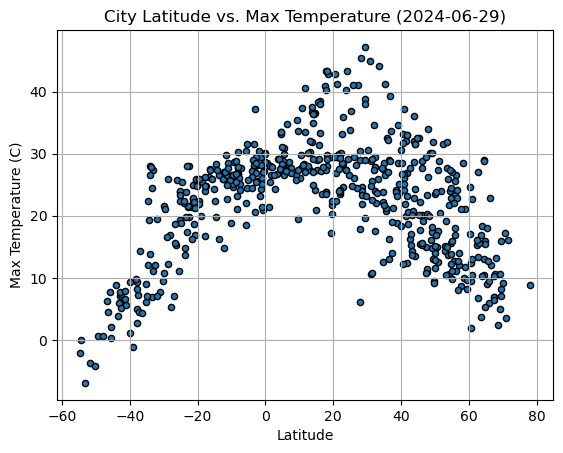

In [86]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot(kind='scatter', x="Lat", y="Max Temp", edgecolors='k')

# Incorporate the other graph properties

import datetime # REVISIT - move to top of this file with other imports
# REVISIT

dt = datetime.datetime.fromtimestamp(city_data_df.loc[0, "Date"])
ax.set_title(f"City Latitude vs. Max Temperature ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

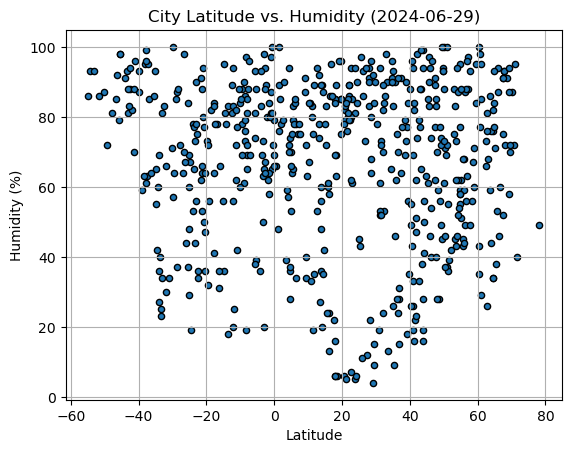

In [90]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot(kind='scatter', x="Lat", y="Humidity", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Humidity ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

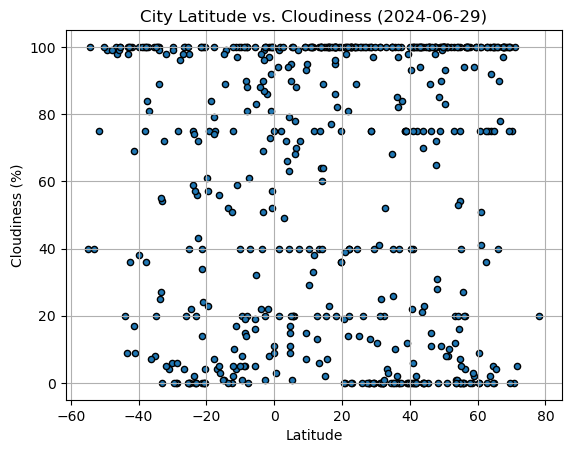

In [91]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot(kind='scatter', x="Lat", y="Cloudiness", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Cloudiness ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

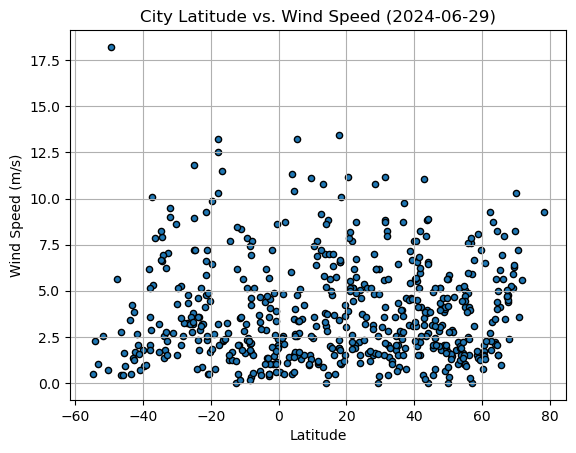

In [92]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot(kind='scatter', x="Lat", y="Wind Speed", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Wind Speed ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nicoya,10.1483,-85.4520,23.14,96,100,1.47,CR,1718609922
3,neftcala,39.3742,49.2472,29.82,54,0,4.61,AZ,1718609923
7,acapulco de juarez,16.8634,-99.8901,28.90,84,100,4.63,MX,1718609929
8,bethel,41.3712,-73.4140,15.92,87,0,1.54,US,1718609815
9,sandnessjoen,66.0217,12.6316,18.29,63,20,1.54,NO,1718609931


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,21.97,97,99,2.68,EC,1718609920
1,papatowai,-46.5619,169.4708,7.39,91,100,5.12,NZ,1718609921
4,ancud,-41.8697,-73.8203,10.80,82,97,9.88,CL,1718609925
5,port mathurin,-19.6833,63.4167,23.99,79,6,2.87,MU,1718609927
6,port-aux-francais,-49.3500,70.2167,3.59,82,54,15.45,TF,1718609928


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.39994946012183763


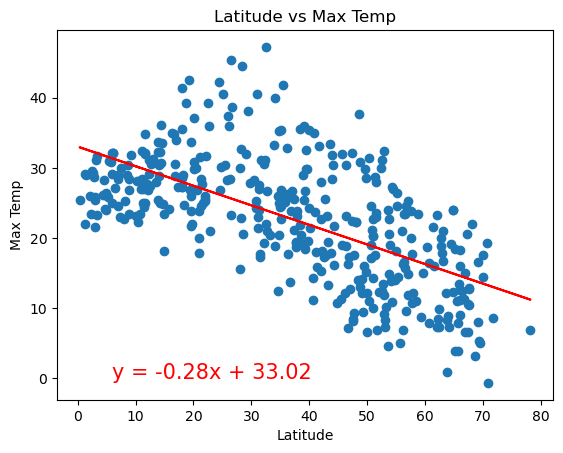

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.5828302644085626


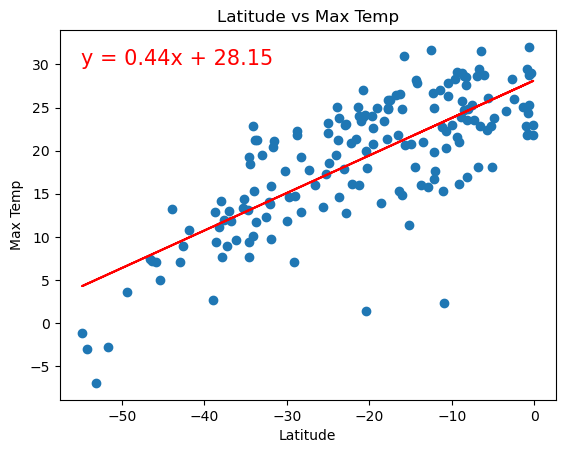

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.005072410242654756


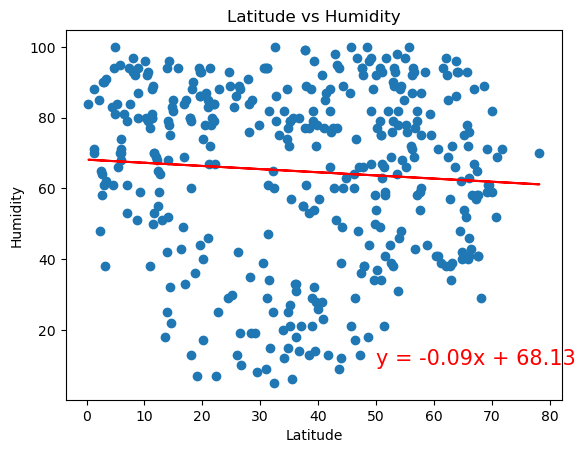

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.0008746520732592251


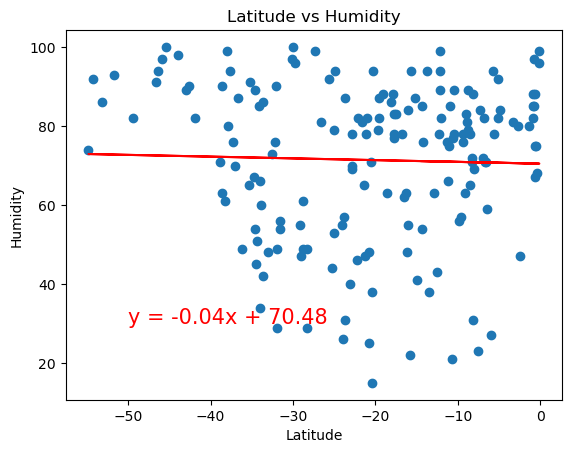

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0062197970047544295


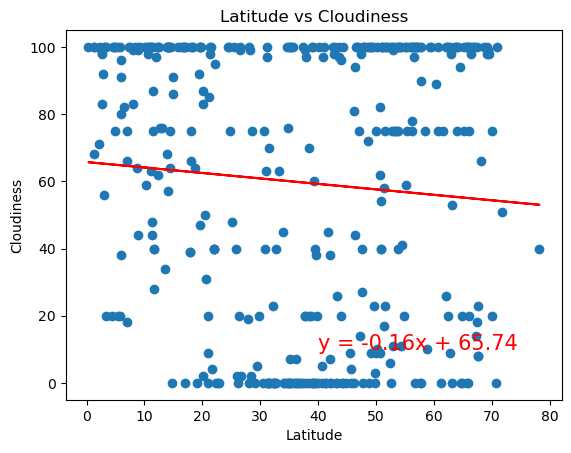

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.03622045202756042


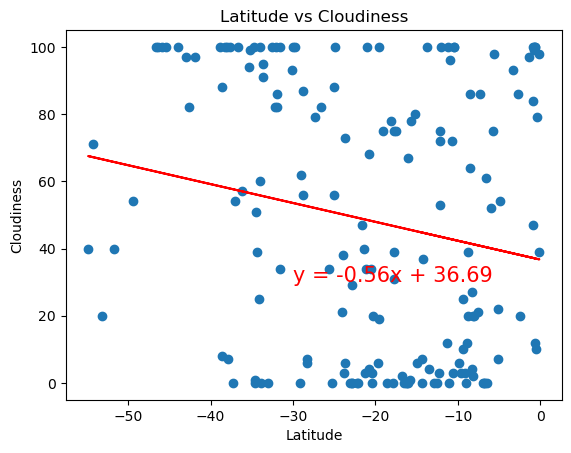

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.012275669442166017


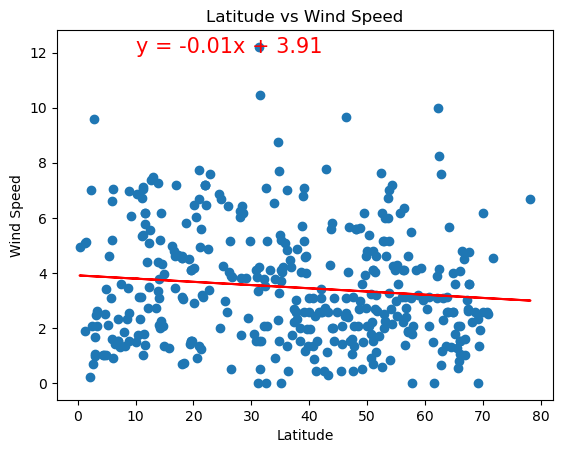

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.010198739304669231


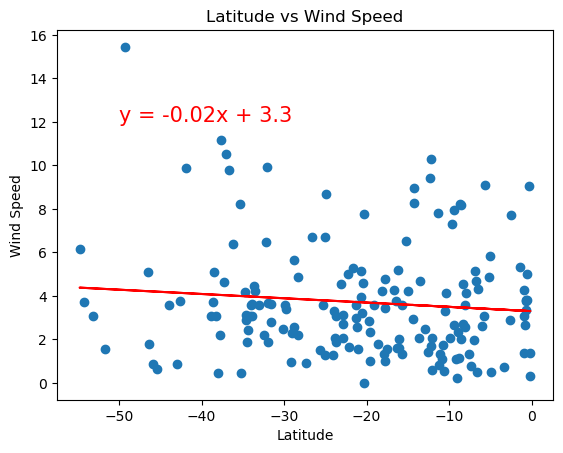

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE